In [1]:
%matplotlib inline
import pandas as pd
from numpy import isnan
df = pd.read_csv(filepath_or_buffer='../input/all-animes-in-mal/mal_anime.csv', index_col=[0], thousands=',')
df['popularity'] = df['popularity'].apply(lambda x: x if isinstance(x, float) else int(x[1:]))
df['rank'] = df['rank'].apply(lambda x: x if isinstance(x, float) else int(x[1:]))
df.head()

,title,episodes,status,theme,demographic,genres,type,favorites,popularity,rank,score,members,synopsis,aired,duration,premiered,studios
0,Fullmetal Alchemist: Brotherhood,64,Finished Airing,Military,Shounen,"Action,Adventure,Drama,Fantasy,",TV,218277,3,1.0,9.10,3190961,After a horrific alchemy experiment goes wrong...,"Apr 5, 2009 to Jul 4, 2010",24 min. per ep.,Spring 2009,Bones
1,Steins;Gate,24,Finished Airing,Unknown,Unknown,"Drama,Sci-Fi,Suspense,",TV,183596,13,2.0,9.07,2452142,Eccentric scientist Rintarou Okabe has a never...,"Apr 6, 2011 to Sep 14, 2011",24 min. per ep.,Spring 2011,White Fox
2,Bleach: Sennen Kessen-hen,13,Finished Airing,Unknown,Shounen,"Action,Adventure,Fantasy,",TV,18421,458,3.0,9.06,455428,Substitute Soul Reaper Ichigo Kurosaki spends ...,"Oct 11, 2022 to Dec 27, 2022",24 min. per ep.,Fall 2022,Pierrot
3,Gintama°,51,Finished Airing,Unknown,Shounen,"Action,Comedy,Sci-Fi,",TV,16042,332,4.0,9.06,599235,"Gintoki, Shinpachi, and Kagura return as the f...","Apr 8, 2015 to Mar 30, 2016",24 min. per ep.,Spring 2015,Bandai Namco Pictures
4,Kaguya-sama wa Kokurasetai: Ultra Romantic,13,Finished Airing,School,Seinen,"Comedy,Romance,",TV,29397,193,5.0,9.05,832346,The elite members of Shuchiin Academy's studen...,"Apr 9, 2022 to Jun 25, 2022",23 min. per ep.,Spring 2022,A-1 Pictures


In [2]:
df.dtypes

title           object
episodes        object
status          object
theme           object
demographic     object
genres          object
type            object
favorites        int64
popularity       int64
rank           float64
score          float64
members          int64
synopsis        object
aired           object
duration        object
premiered       object
studios         object
dtype: object

In [3]:
df.isna().sum()

title             0
episodes          0
status            0
theme             0
demographic       0
genres            0
type              0
favorites         0
popularity        0
rank           4065
score          8968
members           0
synopsis          0
aired             0
duration          0
premiered         0
studios           0
dtype: int64

<Axes: ylabel='status'>

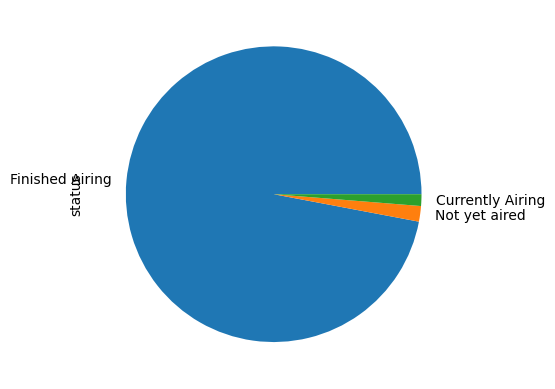

In [4]:
df['status'].value_counts().plot(kind='pie')

<Axes: >

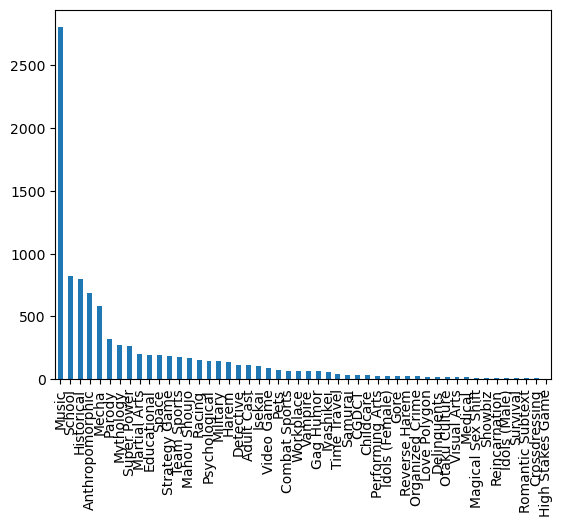

In [5]:
# most f the time the theme is Unknown, but that's uninteresting
df[df['theme'] != 'Unknown']['theme'].value_counts().plot(kind='bar')

<Axes: ylabel='demographic'>

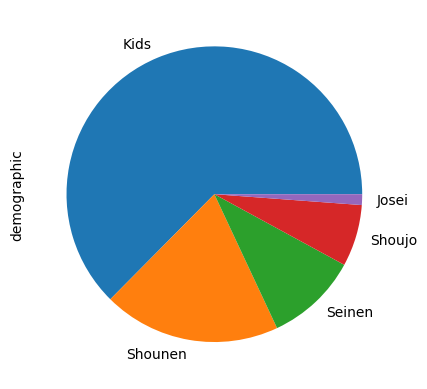

In [6]:
df[df['demographic'] != 'Unknown']['demographic'].value_counts().plot(kind='pie')

<Axes: ylabel='type'>

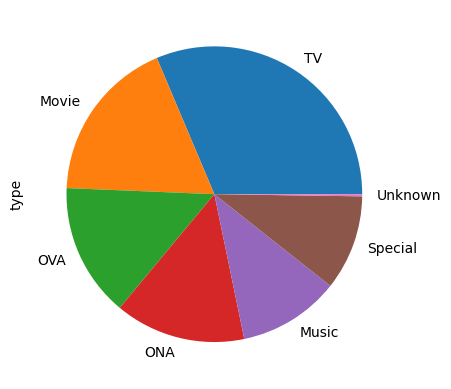

In [7]:
df['type'].value_counts().plot(kind='pie')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='score', ylabel='Count'>

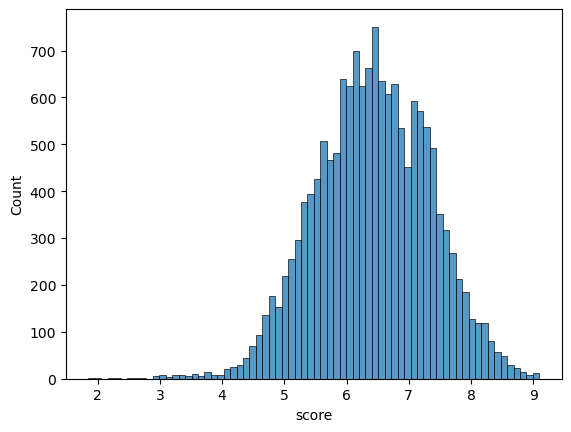

In [8]:
from seaborn import histplot
histplot(data=df, x='score')

<Axes: xlabel='members', ylabel='favorites'>

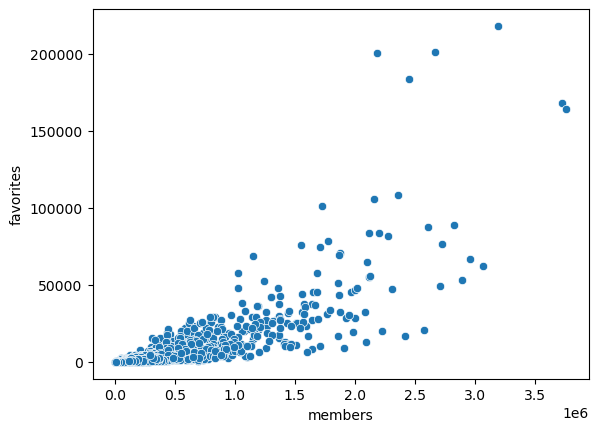

In [9]:
# we sort of expect members and favorites to be positively correlated, don't we?
from seaborn import scatterplot
scatterplot(data=df, x='members', y='favorites')

<Axes: xlabel='popularity', ylabel='rank'>

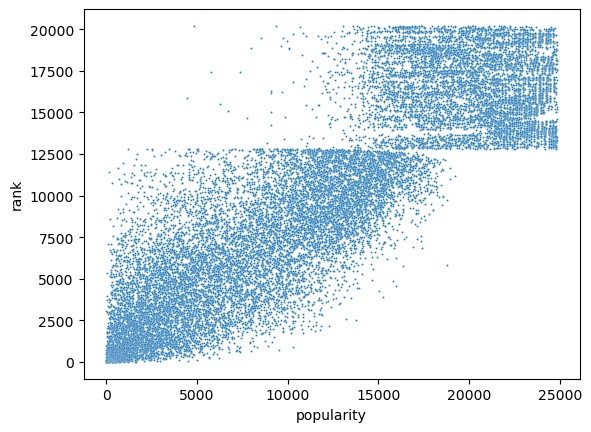

In [10]:
scatterplot(data=df, x='popularity', y='rank', s=2)

That looks weird.

In [11]:
df['duration'].value_counts()

24 min. per ep.          1964
23 min. per ep.          1412
2 min.                   1126
3 min.                   1084
4 min.                    941
                         ... 
12 sec. per ep.             1
1 hr. 16 min. per ep.       1
1 hr. 27 min. per ep.       1
48 sec. per ep.             1
56 sec.                     1
Name: duration, Length: 327, dtype: int64

<Axes: xlabel='premiered year', ylabel='Count'>

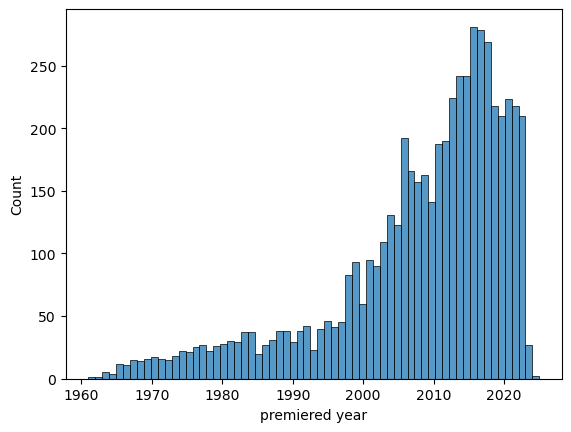

In [12]:
from numpy import nan
df['premiered'].value_counts()
column = 'premiered year'
df[column] = df['premiered'].apply(lambda x: nan if x in {'Unknown', '?'} else int(str(x).split()[1]))
histplot(data=df, x=column, bins=int(df[~df[column].isna()][column].max() - df[~df[column].isna()][column].min() + 1))

In [13]:
df['studios'].nunique()

1510

In [14]:
df['studios'].value_counts()

None found, add some                   10251
Toei Animation                           837
Sunrise                                  535
J.C.Staff                                379
Madhouse                                 335
                                       ...  
Panda Factory,       Studio PuYUKAI        1
Seven,       Geek Toys                     1
Production I.G,       LandQ studios        1
PINE JAM,       CloverWorks                1
Sugar Boy                                  1
Name: studios, Length: 1510, dtype: int64